<a href="https://colab.research.google.com/github/NinaAbeyratne/ML_CW_Census_Income/blob/main/Model_Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [20]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

## Importing the dataset

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the preprocessed dataset CSV file
file_path = "/content/drive/My Drive/ML CW/pre_processed_data.csv"

# Load the dataset
df_features = pd.read_csv(file_path)

Mounted at /content/drive


## Splitting the dataset

In [3]:
# Split the dataset into features (X) and the target variable (y)
x = df_features.drop('income', axis=1)
y = df_features['income']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Naive Bayes

### Model Training

In [4]:
# Train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

### Model Evaluation

In [5]:
# Evaluate the Naïve Bayes model
nb_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

print("Naïve Bayes Model Accuracy:", nb_accuracy)
print("Naïve Bayes Model Classification Report:")
print(nb_report)

Naïve Bayes Model Accuracy: 0.7991765311374164
Naïve Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7332
           1       0.69      0.33      0.44      2383

    accuracy                           0.80      9715
   macro avg       0.75      0.64      0.66      9715
weighted avg       0.78      0.80      0.77      9715



### Model Testing

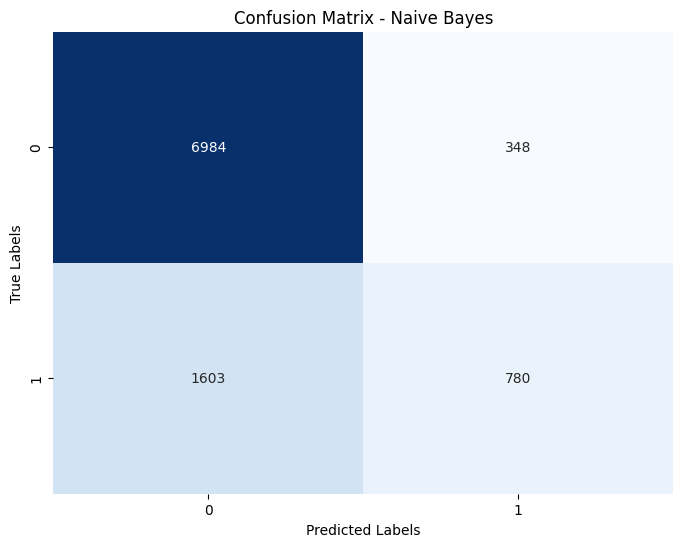

In [6]:
# Predict labels for the test set using Naive Bayes
y_pred_nb = nb_model.predict(x_test)

# Calculate confusion matrix
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Random Forest Classification

### Model Training

In [7]:
# Train the Random Forest Classification model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [8]:
# Evaluate the Random Forest Classification model
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("\nRandom Forest Classification Model Accuracy:", rf_accuracy)
print("Random Forest Classification Model Classification Report:")
print(rf_report)


Random Forest Classification Model Accuracy: 0.8439526505404015
Random Forest Classification Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7332
           1       0.71      0.61      0.66      2383

    accuracy                           0.84      9715
   macro avg       0.80      0.76      0.78      9715
weighted avg       0.84      0.84      0.84      9715



### Model Testing

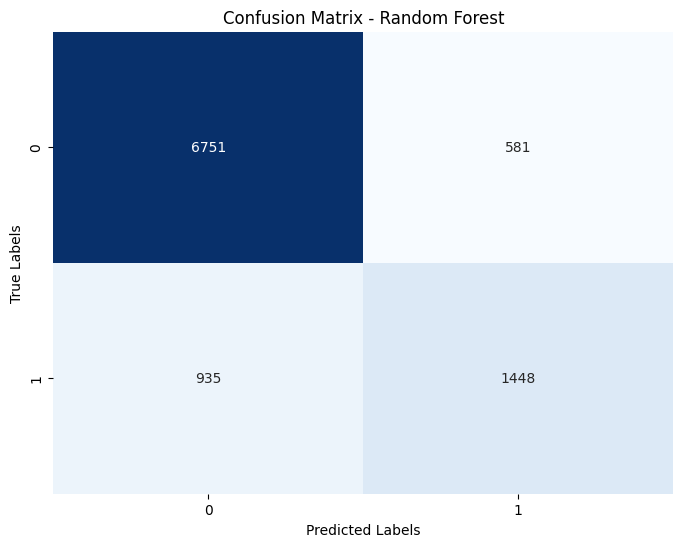

In [9]:
# Predict labels for the test set using Random Forest
y_pred_rf = rf_model.predict(x_test)

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Checking Feature Importance

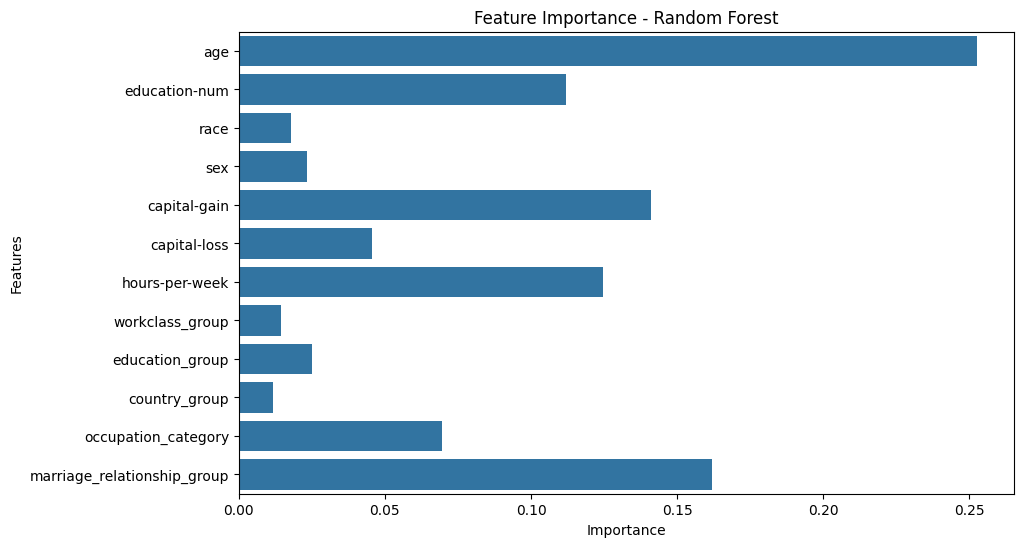

In [10]:
# Extract feature importance from the trained Random Forest model
feature_importance_rf = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=x_train.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Model Comparision

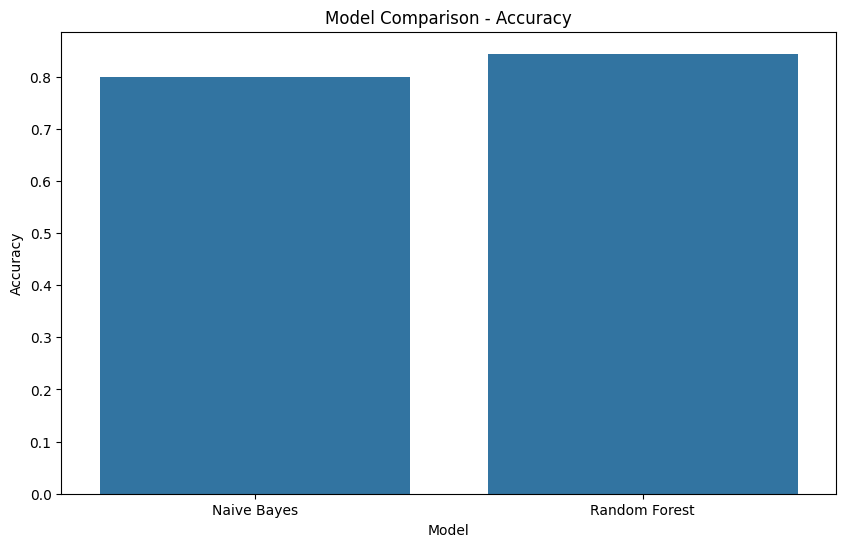

In [21]:
# Calculate precision for Naive Bayes
precision_nb = precision_score(y_test, y_pred_nb)

# Calculate precision for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate recall for Naive Bayes
recall_nb = recall_score(y_test, y_pred_nb)

# Calculate recall for Random Forest
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate F1-score for Naive Bayes
f1_score_nb = f1_score(y_test, y_pred_nb)

# Calculate F1-score for Random Forest
f1_score_rf = f1_score(y_test, y_pred_rf)


# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest'],
    'Accuracy': [nb_accuracy, rf_accuracy],
    'Precision': [precision_nb, precision_rf],
    'Recall': [recall_nb, recall_rf],
    'F1-score': [f1_score_nb, f1_score_rf]
})

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=model_comparison, x='Model', y='Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC Curve

In [18]:
# Initialize the Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Predict probabilities for the test data
y_prob_nb = nb_classifier.predict_proba(x_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict probabilities for the test data
y_prob_rf = rf_classifier.predict_proba(x_test)

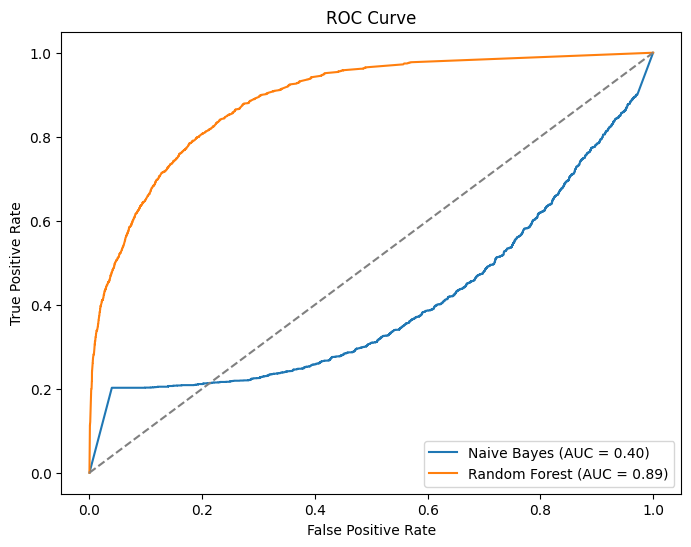

In [19]:
# Calculate ROC curve and AUC score for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb[:, 1])
auc_nb = roc_auc_score(y_test, y_prob_nb[:, 1])

# Calculate ROC curve and AUC score for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf[:, 1])
auc_rf = roc_auc_score(y_test, y_prob_rf[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Threshhold Adjusting for Naive Bayes

In [12]:
# Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Predict probabilities for the positive class
y_pred_proba_nb = nb.predict_proba(x_test)[:, 1]

# Choose a new threshold (e.g., 0.6)
new_threshold = 0.6

# Adjust predictions based on the new threshold
y_pred_nb_adjusted = (y_pred_proba_nb >= new_threshold).astype(int)

# Evaluate the performance of the adjusted predictions
accuracy_nb_adjusted = accuracy_score(y_test, y_pred_nb_adjusted)
precision_nb_adjusted = precision_score(y_test, y_pred_nb_adjusted)
recall_nb_adjusted = recall_score(y_test, y_pred_nb_adjusted)
f1_score_nb_adjusted = f1_score(y_test, y_pred_nb_adjusted)

# Print classification report for adjusted predictions
print("Classification Report for Naive Bayes (Adjusted Threshold)")
print(classification_report(y_test, y_pred_nb_adjusted))

# Output adjusted model performance metrics
print("Accuracy (Adjusted): {:.4f}".format(accuracy_nb_adjusted))
print("Precision (Adjusted): {:.4f}".format(precision_nb_adjusted))
print("Recall (Adjusted): {:.4f}".format(recall_nb_adjusted))
print("F1 Score (Adjusted): {:.4f}".format(f1_score_nb_adjusted))

Classification Report for Naive Bayes (Adjusted Threshold)
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7332
           1       0.70      0.31      0.43      2383

    accuracy                           0.80      9715
   macro avg       0.76      0.64      0.66      9715
weighted avg       0.78      0.80      0.77      9715

Accuracy (Adjusted): 0.7988
Precision (Adjusted): 0.7004
Recall (Adjusted): 0.3139
F1 Score (Adjusted): 0.4335


## Testing

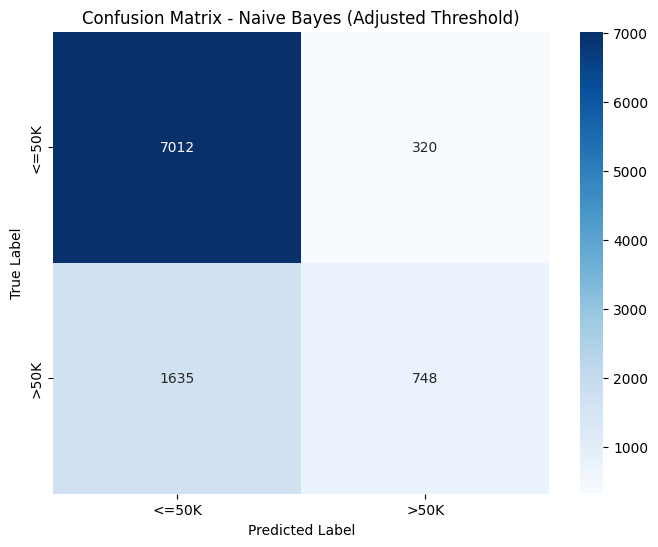

In [13]:
# Compute confusion matrix
conf_mat_nb_adjusted = confusion_matrix(y_test, y_pred_nb_adjusted)

# Plot confusion matrix for Naive Bayes (adjusted threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes (Adjusted Threshold)')
plt.show()